In [7]:
from atomtoolkit import IO
import matplotlib.pyplot as plt
from atomtoolkit import *
import atomtoolkit.render.lineshapes as lineshapes
from atomtoolkit.atom import Atom
import atomtoolkit.render.spectra as spectra
from pprint import pprint
import numpy as np

In [8]:
resource_path = 'C:/Users/jippi/PycharmProjects/Atom-Toolkit/resources'

def load_atom(species, num_levels=None, save=False, B=Q_(0.0, 'G'), load_from_pickle=False):
    if load_from_pickle:
        a = Atom.load(f'atoms/{species}.atom')
    else:
        df = IO.load_NIST_data(speciesdict[species]['species'])
        if 'trans_path' in speciesdict[species]:
            trans_df = IO.load_transition_data(speciesdict[species]['trans_path'], columns={
                "conf_l": "LConfiguration", "conf_u": "UConfiguration",
                "term_l": "LTerm", "term_u": "UTerm", "j_l": "LJ", "j_u": "UJ",
                "A": "A DREAM"}).dropna(subset=['A'])
        else:
            trans_df = None
        a = IO.generate_full_from_dataframe(df, species, speciesdict[species]['I'],
                                         num_levels=num_levels,
                                         B=B,
                                         hf_csv=f'{resource_path}/{species}_Hyperfine.csv',
                                         transitions_df=trans_df,
                                         allowed=0b101)
        if save:
            a.save(f'atoms/{species}.atom')
            a.generate_hf_csv(filename=f'{resource_path}/{species}_Hyperfine.csv')
        print('Generation complete')
    return a

In [9]:
speciesdict = {
    '171Yb': {'species': 'Yb II', 'I': 0.5, 'trans_path': f"{resource_path}/Yb_II_Oscillator_Strengths.csv"},
    '171Yb_2': {'species': 'Yb II', 'I': 0.5},
    '173Yb': {'species': 'Yb II', 'I': 2.5, 'trans_path': f"{resource_path}/Yb_II_Oscillator_Strengths.csv"},
    '138Ba': {'species': 'Ba II', 'I': 0.0},
    '133Ba': {'species': 'Ba II', 'I': 0.5},
    '201Hg': {'species': 'Hg I', 'I': 1.5},
    '9Be': {'species': 'Be II', 'I': 1.5}
}

In [10]:
# whether to load from pickle
load_from_pickle = False
# whether to save the ion
save = False
# Name of the atom
species = '173Yb'
# Number of levels to generate
num_levels = 20
# Magnetic field
B = Q_(5.0, 'G')

a = load_atom(species, load_from_pickle=load_from_pickle, save=save, num_levels=num_levels, B=B)

data finalized: 100%|████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.69it/s]
adding level 4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2                                                                     
adding transition 4f14.5d 2D3/2 → 4f14.6p 2P*1/2                                                                       
adding internal transitions to 4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2                                                   

Generation complete


In [5]:
a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].set_frequency(Q_(320.570339, 'THz'))
a.transitions[('4f14.6s 2S1/2', '4f14.6p 2P*1/2')].set_frequency(Q_(812.128235, 'THz'))

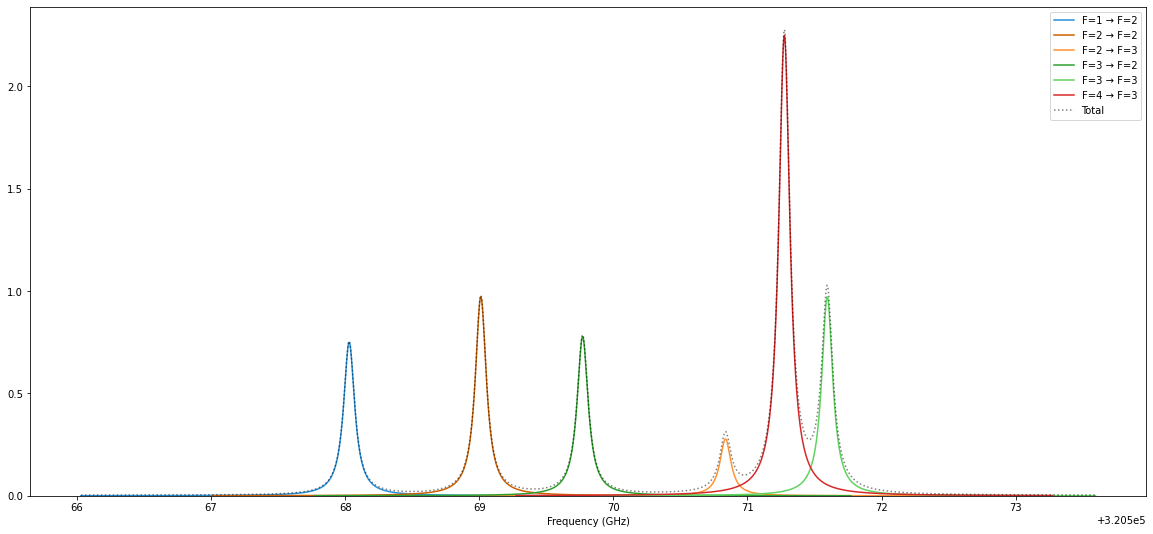

In [7]:
%matplotlib inline

a.B = Q_(50.0, 'G')

plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.1)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.1, depth=0, mod_freq_GHz=0.8)

# spectra.plot_spectrum(list(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].subtransitions.values()),
#                        lineshape=lineshape, coloring='l', num_points=1000)

spectra.plot_spectrum(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')],
                       lineshape=lineshape, coloring='l', num_points=1000)
# plt.xlim(3.205e5+66, 3.205e5+73)

# from src.lineshapes import lorentzian
# import numpy as np
# x_vals = np.linspace(3.205e5+65, 3.205e5+75, 4000)
# y_vals = lorentzian(x_vals, 320570-.535, gamma=1.5, ampl=1.) + lorentzian(x_vals, 320570+1.275, gamma=0.5, ampl=2.5)
# plt.plot(x_vals, y_vals, 'g')

plt.savefig('d_state_spectrum.png')
plt.show()


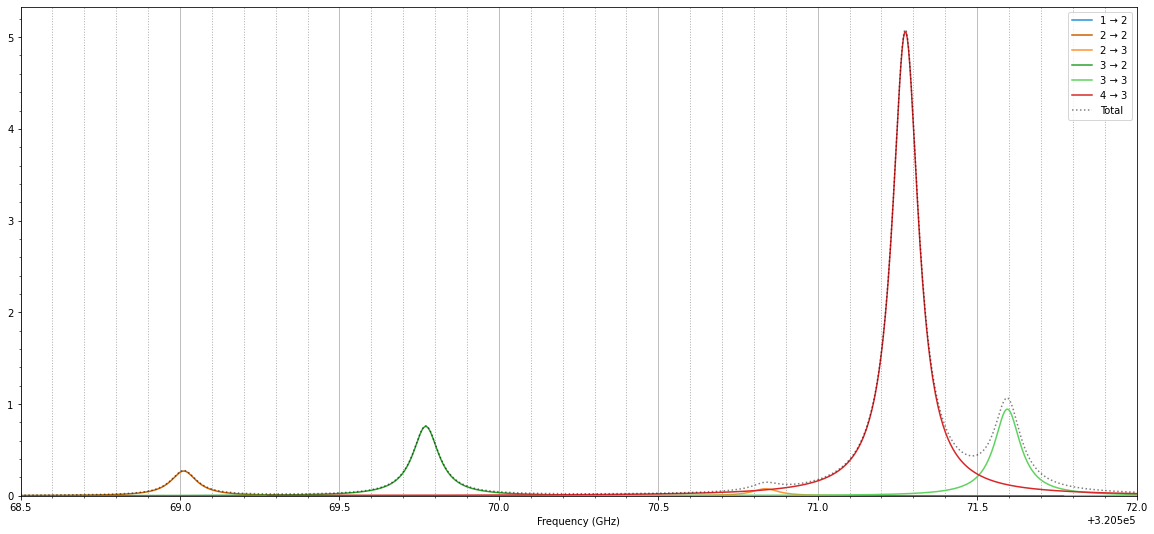

In [7]:
%matplotlib inline

plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.1)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.15, depth=8, mod_freq_GHz=0.8)

ampl_dict = {'4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.,
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.2777777777777778, 
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.2777777777777778,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.9722222222222222,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.9722222222222222,
            '4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 2.2500000000000004,}

spectra.plot_spectrum(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')],
                       lineshape=lineshape, coloring='l', num_points=1000, ampl_dict = ampl_dict)
plt.xlim(3.205e5+68.5, 3.205e5+72)

# plt.ylim(0, 6)
ax = plt.gca()
ax.grid(True, 'major', axis='x')
ax.minorticks_on()
ax.grid(True, 'minor', axis='x', linestyle=':', linewidth=1)

plt.savefig('d_state_spectrum_f=3.png')
plt.savefig('predicted.png')
plt.show()


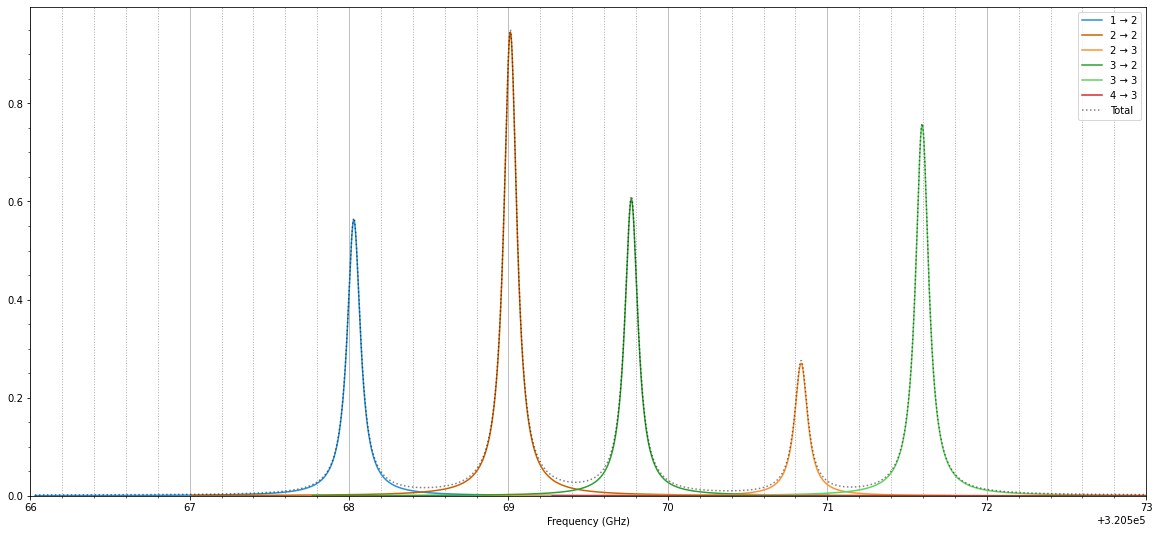

In [8]:
%matplotlib inline

plt.figure(figsize=(20, 9))

lineshape = lineshapes.LorentzianLineShape(gamma=.1)
mod_lineshape = lineshapes.ModLorentzianLineShape(gamma=.5, depth=0, mod_freq_GHz=0.8)

ampl_dict = {'4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.7499999999999999,
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.9722222222222224, 
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.9722222222222224,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.7777777777777778,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.7777777777777778,
            '4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.,}


# center = 320570.700
# freq = .850
# lines = [center + x*freq for x in np.arange(-2, 3)]
# print(lines)
# plt.vlines(lines, 0.0, 1.0)

spectra.plot_spectrum(a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')],
                        lineshape=lineshape, coloring='l', num_points=3000, ampl_dict = ampl_dict)


# plt.ylim(0, 6)
plt.xlim(3.205e5+66, 3.205e5+73)
ax = plt.gca()
ax.grid(True, 'major', axis='x')
ax.minorticks_on()

ax.grid(True, 'minor', axis='x', linestyle=':', linewidth=1)


plt.show()

In [9]:
pprint([(s.name, str(s.freq.to('GHz')-s.parent.freq.to('GHz')), s.rel_strength) for s in a.transitions[('4f14.5d 2D3/2', '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2')].subtransitions.values()])

[('4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '-2.3091075000120327 gigahertz',
  0.7499999999999999),
 ('4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '-1.3273674999945797 gigahertz',
  0.9722222222222224),
 ('4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '0.4966324999695644 gigahertz',
  0.2777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2',
  '-0.5683075000415556 gigahertz',
  0.7777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '1.2556924999807961 gigahertz',
  0.9722222222222222),
 ('4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3',
  '0.9358124999562278 gigahertz',
  2.2500000000000004)]


In [10]:
pprint([(s.name, str(s.freq.to('THz')), s.rel_strength) for s in a.transitions[('4f14.5d 2D3/2', '4f14.6p 2P*1/2')].subtransitions.values()])

[('4f14.5d 2D3/2 F=1 → 4f14.6p 2P*1/2 F=2',
  '123.78054002786 terahertz',
  0.7499999999999999),
 ('4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=2',
  '123.78152176786 terahertz',
  0.9722222222222224),
 ('4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=3',
  '123.77977816786 terahertz',
  0.2777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=2',
  '123.78228082785999 terahertz',
  0.7777777777777778),
 ('4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=3',
  '123.78053722786 terahertz',
  0.9722222222222222),
 ('4f14.5d 2D3/2 F=4 → 4f14.6p 2P*1/2 F=3',
  '123.78021734786 terahertz',
  2.2500000000000004)]


In [11]:
p_state_ampls = {s.name: s.rel_strength for s in a.transitions[('4f14.5d 2D3/2', '4f14.6p 2P*1/2')].subtransitions.values()}
p_state_ampls

{'4f14.5d 2D3/2 F=1 → 4f14.6p 2P*1/2 F=2': 0.7499999999999999,
 '4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=2': 0.9722222222222224,
 '4f14.5d 2D3/2 F=2 → 4f14.6p 2P*1/2 F=3': 0.2777777777777778,
 '4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=2': 0.7777777777777778,
 '4f14.5d 2D3/2 F=3 → 4f14.6p 2P*1/2 F=3': 0.9722222222222222,
 '4f14.5d 2D3/2 F=4 → 4f14.6p 2P*1/2 F=3': 2.2500000000000004}

In [12]:
ampl_dict = {'4f14.5d 2D3/2 F=1 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.,
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.2777777777777778, 
            '4f14.5d 2D3/2 F=2 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.2777777777777778,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=2': 0.9722222222222222,
            '4f14.5d 2D3/2 F=3 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 0.9722222222222222,
            '4f14.5d 2D3/2 F=4 → 4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2 F=3': 2.2500000000000004,}